比賽簡介：

  概述：
    歡迎來到2912年，在這裡需要你的數據科學技能來解決一個宇宙之謎。我們收到了來自四光年外的傳輸消息，情況看起來並不好。

    鐵達尼號宇宙飛船是一個月前發射的星際客輪。船上有近13,000名乘客，這艘船開始了處女航，將移民從我們的太陽系運送到三顆圍繞附近恆星運行的新的可居住的系外行星。

    鐵達尼號宇宙飛船在繞過半人馬座阿爾法星前往第一個目的地——55 Cancri E的途中，闖進了隱藏在塵埃雲中時空異常區域。可悲的是，它遇到了與1000年前同名遊輪相同的命運。雖然飛船完好無損，但幾乎一半的乘客被運送到另一個維度！


為什麼選擇這個比賽：與機器學習高度相關，且相較其他競賽較為基礎，與剛踏入機器學習領域的我較為契合。


資料集、目標介紹：

  資料集：
    此比賽所使用的數據集中有test.csv / train.csv兩個文件，結果以sample_submission.csv為範本參考。

  目標介紹：
    為了幫助救援人員找回失踪的乘客，您面臨的挑戰是使用從宇宙飛船損壞的計算機系統中恢復的記錄來預測哪些乘客被傳送到時空異常區域。拯救失蹤人員改變歷史！

實作過程如下：程式碼與結果


跟上課內容的關聯性：處理缺失值(0、中位數填補)、訓練過程相似、數據可視化(圖表轉換)


延伸學習了哪些：利用其他圖表呈現以及訓練模型作為預測結果

比賽結果說明：
  分數：0.74748 / 排名：1896 (共2429)


推測還可能從哪些方式改善：使用不同的訓練模型


不同的嘗試與結果分析：
  若將以下連結的程式碼上傳至Kaggle，可能會得到更高的準確率，因為他填入缺失值的方式是使用姓名當中的稱謂中位數來填補，比起填中位數要準確的多。(但因著作權問題沒有實際測試，以上為參考蒐集到的相關資料)

    程式碼連結：https://github.com/YLTsai0609/Kaggle-Titanic-Top3-percent/blob/master/Titanic%20Top%203%25%20on%20Medium.ipynb
    相關資料來源：https://yulongtsai.medium.com/https-medium-com-yulongtsai-titanic-top3-8e64741cc11f



#匯入 modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#匯入資料並觀察資料

In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#從上圖中可以得知有不分數據缺失，因此此步驟為查看每一列的缺失數量

In [5]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['缺失數', '缺失率'])
missing_data

,缺失數,缺失率
CryoSleep,217,0.024963
ShoppingMall,208,0.023927
VIP,203,0.023352
HomePlanet,201,0.023122
Name,200,0.023007
Cabin,199,0.022892
VRDeck,188,0.021627
FoodCourt,183,0.021051
Spa,183,0.021051
Destination,182,0.020936


#又從上圖中可以得知每一項的缺失數和缺失率，而圖中只有 PassengerId 跟 Transported 兩者沒有缺失。因此接下來要來處理缺失值。

#將"Unknown"填到Name的缺失值中

In [6]:
train.Name = train.Name.fillna('Unknown')
print(train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
dtype: int64


#上圖Name原本缺失的數值經過填充已經沒有缺失值了，再來處理 CryoSleep 和 VIP。

#將 False 填入 CryoSleep 列表和 VIP 列表缺失值中。

In [7]:
train['CryoSleep']=train['CryoSleep'].fillna(False)
train['VIP']=train['VIP'].fillna(False)
print(train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
dtype: int64


#上述缺失值都已歸零，接著處理Age

#將平均填到缺失值中

In [8]:
train['Age']=train['Age'].fillna(train['Age'].mean())
print(train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
dtype: int64


#接著處理 RoomService , FoodCourt , ShoppingMall , Spa , VRDeck 的缺失值。

#上文中有提到，有些乘客選擇了在冷凍睡眠艙度過旅行時間，因此這些乘客在冷凍睡眠狀態下不會產生這些費用，所以將在他們 RoomService , FoodCourt , ShoppingMall , Spa , VRDeck 有缺失值的部分都填入0。

#沒有在冷凍睡眠狀態下度過的乘客則是使用填入平均數的方式處理 RoomService , FoodCourt , ShoppingMall , Spa , VRDeck 的缺失值。

In [10]:
train['RoomService']=train['RoomService'].fillna(train['RoomService'].mean())
train['FoodCourt']=train['FoodCourt'].fillna(train['FoodCourt'].mean())
train['ShoppingMall']=train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
train['Spa']=train['Spa'].fillna(train['Spa'].mean())
train['VRDeck']=train['VRDeck'].fillna(train['VRDeck'].mean())
print(train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
dtype: int64


#在處理 HomePlanet 跟 Destination 前，我們可以透過下面程式碼所產生的圖片觀察到前往TRAPPIST-1e星球的乘客最多，來自於Earth的乘客最多。

In [11]:
analys = train.loc[:,['HomePlanet','Destination']]
analys['numeric'] =1
analys.groupby(['Destination','HomePlanet']).count()

numeric
Destination   HomePlanet         
55 Cancri e   Earth           690
              Europa          886
              Mars            193
PSO J318.5-22 Earth           712
              Europa           19
              Mars             49
TRAPPIST-1e   Earth          3101
              Europa         1189
              Mars           1475

#由於上述的發現，因此將 TRAPPIST-1e 和 Earth 填入到 HomePlanet 列和 Destination 列對應的缺失值中。

In [12]:
train['Destination']=train['Destination'].fillna('TRAPPIST-1e')
train['HomePlanet']=train['HomePlanet'].fillna('Earth')
print(train.isnull().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
dtype: int64


#由圖可知，除了Cabin這項沒有處理，其他缺失值都透過方法填補了，而任務中並沒有提到Cabin的處理規範，因此先不處理，也不影響測試結果。

#接下來為數據分析

#首先先看一下所有乘客的年齡分佈情況。

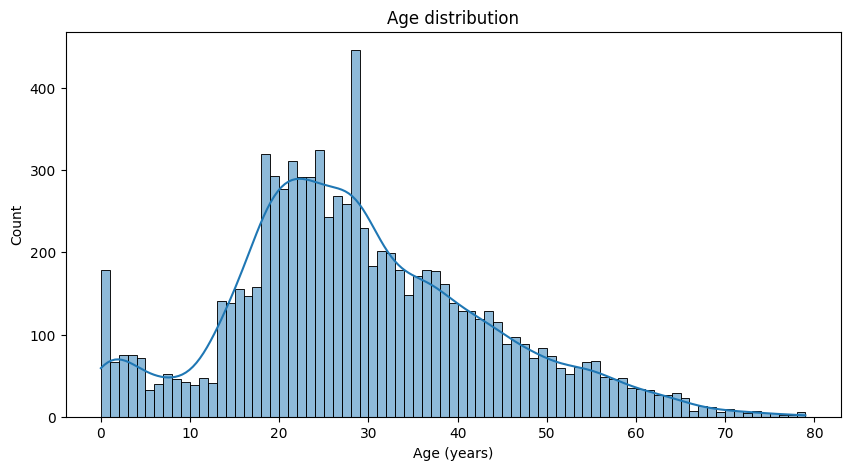

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train, x='Age', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)');

#從上圖可知，本艘飛船的乘客年齡多介於0歲至30歲之間，其中29歲的乘客最多；另外，1歲的乘客也比大多數年齡段的乘客數量多。

#接下來分析 Transported 與其他列的關係。

<Axes: xlabel='Destination', ylabel='Transported'>

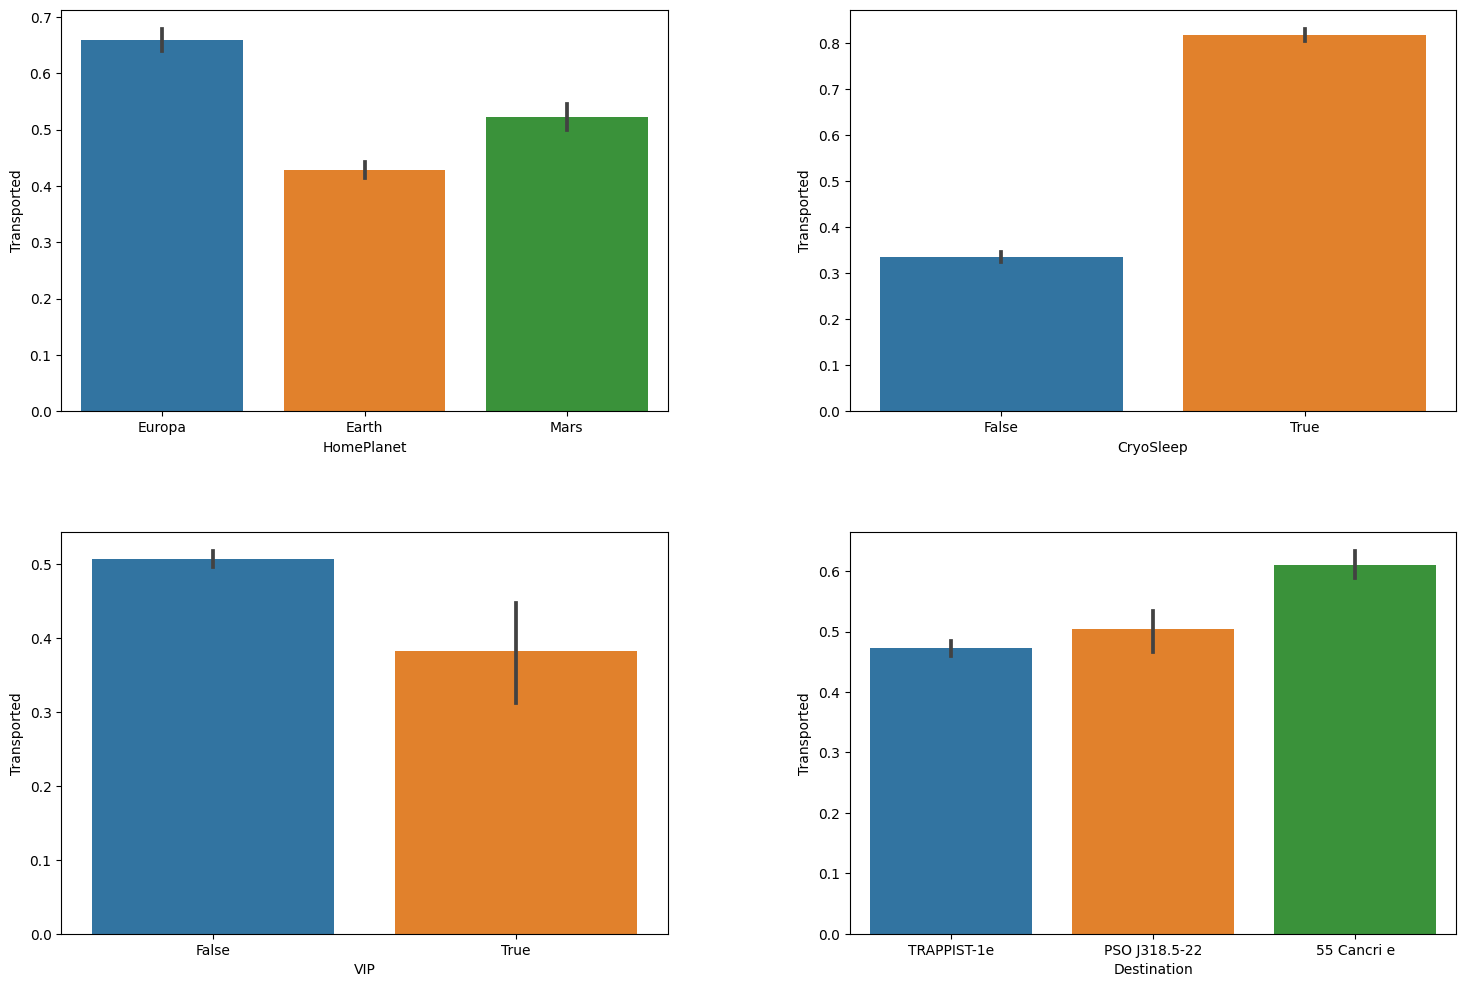

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18, 12)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
temp = train.fillna(-1)
sns.barplot(x = "HomePlanet", y= "Transported", data=temp, ax = ax[0][0])
sns.barplot(x = "CryoSleep", y= "Transported", data=temp, ax = ax[0][1])
sns.barplot(x = "VIP", y= "Transported", data=temp, ax = ax[1][0])
sns.barplot(x = "Destination", y= "Transported", data=temp, ax = ax[1][1])

#以不同方式呈現，可以交叉觀察

C:\Users\cherr\AppData\Local\Temp\ipykernel_22032\1394094718.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


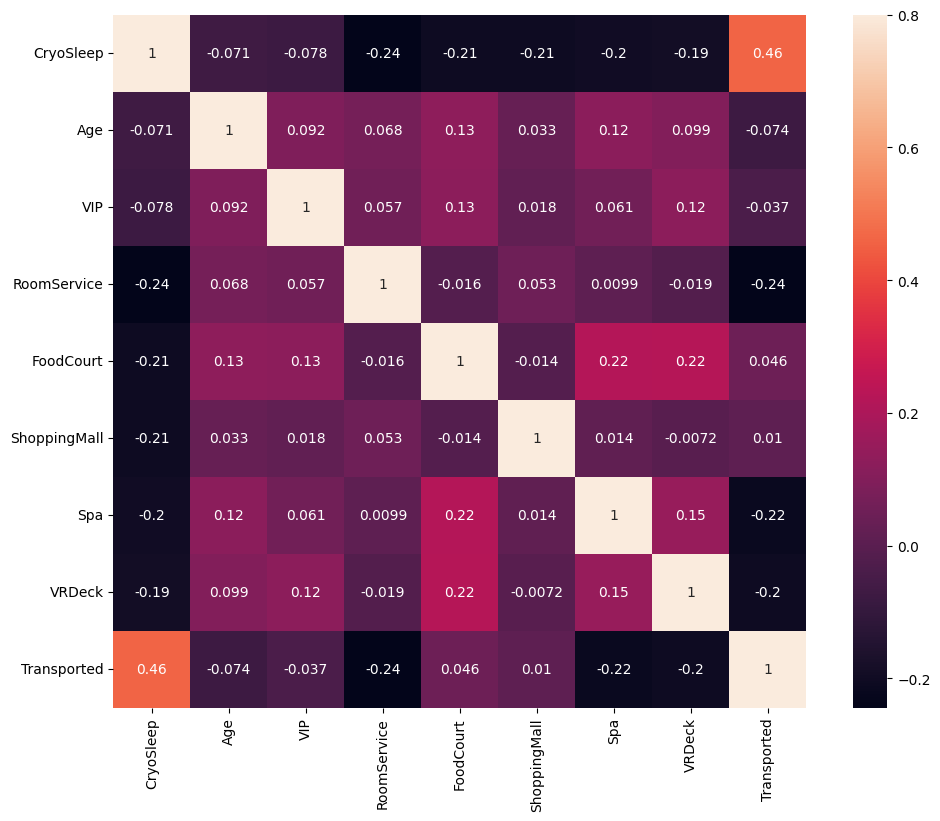

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True)
plt.show()

#由上面兩張圖可以很直接地發現 CryoSleep 與 Transported 關聯度最高，因此可以推測乘客：是否進入冷凍休眠狀態與是否被傳送到另一個維度之間存在關聯。

#接下來查看與 Transported 關聯度最高的五個列。

In [18]:
corrmat = train.corr()
k = 6 
high_corr_values = corrmat.nlargest(k, 'Transported')['Transported'].index
high_corr_values = high_corr_values.drop('Transported')
high_corr_values

C:\Users\cherr\AppData\Local\Temp\ipykernel_22032\3504601815.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


Index(['CryoSleep', 'FoodCourt', 'ShoppingMall', 'VIP', 'Age'], dtype='object')

#由上圖可以發現，CryoSleep ， FoodCourt ，ShoppingMall ，VIP ， Age 是與 Transported 關聯度最高的五個列。

#接著進入訓練模型階段

#首先要搭建訓練模型。

#CryoSleep ， FoodCourt ，ShoppingMall ，VIP ， Age 是與 Transported 關聯度最高的五個列，定義為high_corr_values，以此作為訓練模型的輸入數據，定義為X。Transported 列作為訓練模型的標籤定義為y。

#將train.csv文件中80%數據用於訓練，剩餘20%數據用於測試模型。並把X_train定義為訓練用自變量，y_train定義為訓練用因變量

In [19]:
from sklearn.model_selection import train_test_split
X = train[high_corr_values]
y = train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

#前置作業處理好後，接著使用 Hist gradient boosting 訓練模型來預測結果。

In [21]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train,y_train)
hgbc_pred = hgbc.predict(X_test)
print("Hist gradient boosting accuracy: {}".format(accuracy_score(y_test,hgbc_pred)))

Hist gradient boosting accuracy: 0.7659574468085106


#Hist gradient boosting 的模型精準度為0.769

#最後將此模型輸出預測文件(csv檔)

In [22]:
test_ids = test["PassengerId"]
from sklearn.preprocessing import LabelEncoder
categorical_values_test = test.select_dtypes(include=['object']).columns
for i in categorical_values_test:
    lbl = LabelEncoder() 
    lbl.fit(list(test[i].values)) 
    test[i] = lbl.transform(list(test[i].values))
real_predictions = hgbc.predict(test[high_corr_values])
test["PassengerId"] = test_ids
real_predictions = list(map(bool,real_predictions))
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': real_predictions})
output.to_csv('submission.csv', index=False)

資料來源：
    https://www.kaggle.com/competitions/spaceship-titanic/overview
    https://www.cnblogs.com/bokeyuan199/p/16997206.html